<center><font size = "10"> Week 9 - Cells in Space  <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 
<br>Group member1: 
<br>Group member2:
<br>Group member3:

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import neurom as nm
import numpy as np

## Optional. Placing cells in a cubic volume

<font size='3'>Define a cubic volume with the following dimensions: x = (2000, 5000), y = (2000, 5000), z = (-1000, 2000). Place the five morphologies assigned to your group (used in week7) in random positions inside the cube. Visualize the cells in the cube in three different planes: xy, xz and yz. 

## Ex2. 3D Rotaion around a vector

<font size='3'>To start of, compute a 2D rotation along the y axis on the inhibitory cells from your data set (week 7), the rotation angles should be: -90°, -180° and -270°. Plot the results in xy plane. Now compute a 3D rotation to align your pyramidal cells' z axis with the vector (3,4,5). [1.5 pts]

## 2D rotation along y axis


In [143]:
# Useful functions
def shift_morphology(morph,shift):
    morph2 = morph.transform(lambda p: p + shift)
    return morph2
       
def center_morphology(morph):
    center = morph.soma.center.copy()
    return shift_morphology(morph,-center)

# Poorman's plotting of morphologies
def plot_morphology(morph,name_morph, angle,  plane = 'XY',somaOnly = False):
    colors_dict={nm.BASAL_DENDRITE:'red', 
            nm.APICAL_DENDRITE:'green',
            nm.AXON:'blue',
            nm.SOMA:'black'}

    planes = { 'XY': [0,1], 'XZ': [0,2], 'YZ': [1,2], 'YX': [1,0], 'ZX': [2,0], 'ZY': [2,1] }
   
    if not somaOnly:
        for n in morph.neurites:
            pts = n.points[:,[0,1,2]]
            plt.scatter(pts[:,planes[plane][0]],pts[:,planes[plane][1]],s=1,c=colors_dict[n.type.value],marker='.')
    pts = morph.soma.center
    
    plt.scatter(pts[planes[plane][0]],pts[planes[plane][1]],c=colors_dict[nm.NeuriteType.soma.value],marker='D')
    plt.title('Morphology:  '+str(name_morph)+', rotation angle:  '+str(angle))
    
   
def plot_morphologies(morphlist, name_morph, angle=0, plane = 'XY',somaOnly = False):
    fig = plt.figure()
    fig.suptitle(plane)
    
    for i,m in enumerate(morphlist):
        plot_morphology(m, name_morph,angle,plane = plane, somaOnly = somaOnly)
        
# Rotation matrix around y axis, angle theta CCW (degrees)
def roty(theta):
    radtheta = theta * np.pi / 180.0 # in radians
    R = np.array([[np.cos(radtheta),0, np.sin(radtheta)],
                  [0,1,0],
                  [-np.sin(radtheta),0,np.cos(radtheta)]])
    return R
    
# apply rotation matrix R
def rotate_morphology(morph,R):
    morph = morph.transform(lambda p: R.dot(p.T).T)
    return morph

def roty_morphology(morph,theta):
    R = roty(theta)
    return rotate_morphology(morph,R)
       

In [144]:
# Load a morphology
morph_names_inh = ['Inh_1', 'Inh_2']
morph_1 = nm.load_morphology('Int_01.swc')
morph_2 = nm.load_morphology('Int_02.swc')

# Center morphology
morph_1=center_morphology(morph_1)
morph_2=center_morphology(morph_2)


### Morphologies before rotation

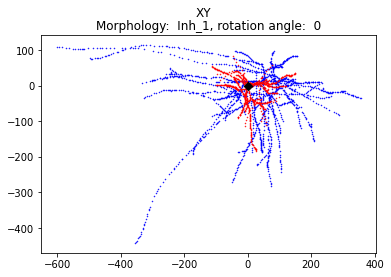

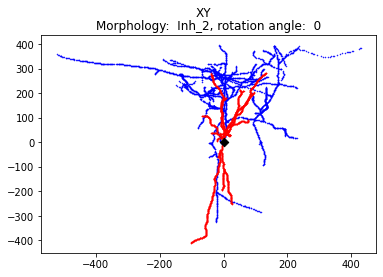

In [145]:
# plot morphologies
plot_morphologies([morph_1], 'Inh_1', angle=0)
plot_morphologies([morph_2], 'Inh_2', angle=0)

### Morphologies after rotation

In [146]:
# Verification of the y rotation matrix
R = roty(90)
# Test
R.dot([1,0,0]) # = [0,0,1]

array([ 6.123234e-17,  0.000000e+00, -1.000000e+00])

The rotation matrix rotate properly the vector, thus we can apply it to our morphologies.

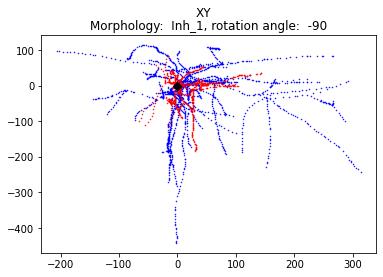

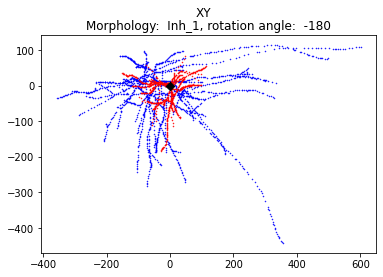

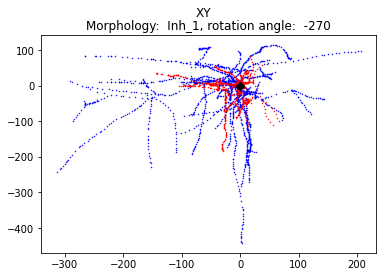

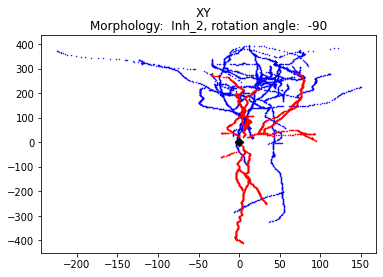

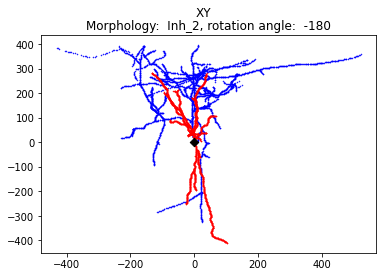

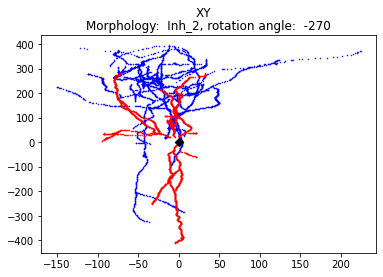

In [147]:
morphologies_inh = [morph_1,morph_2]
angles = [-90, -180, -270]
for i in range(len(morphologies_inh)):
    for angle in angles:
        morph=roty_morphology(morphologies[i],angle)
        plot_morphologies([morph], morph_names_inh[i], angle)

## Alignement 3D rotation

In [148]:
# 3D alignement function
def align_morphology_Z(morph,axis):
    # Rotation matrix that aligns the Z axis [0,0,1] to an arbitrary vector b (other than Z or -Z)
    # From https://math.stackexchange.com/a/476311
    a = np.array([0,0,1])

    b = np.array(axis) # target axis
    b = b / np.linalg.norm(b) # make unit norm

    v = np.cross(a,b)     # a x b
    s = np.linalg.norm(v) # ||v|| = sin(theta)
    c = a.dot(b)          # a . b = cos(theta)

    # Skew-symmetric cross-product matrix
    V = np.zeros((3,3))
    V[0,1] = -v[2]
    V[1,0] =  v[2]
    V[0,2] =  v[1]
    V[2,0] = -v[1]
    V[1,2] = -v[0]
    V[2,1] =  v[0]

    # Rotation matrix
    R = np.diag((1.0,1.0,1.0))
    R += V
    R += V.dot(V) * (1.0 - c) / (s * s)

    # Test
    if not np.max(R.dot(a) - b) < 1E-12:
        raise ValueError('Matrix not good!')
    
    # Rotate morphology
    return rotate_morphology(morph,R)

In [149]:
# Load a morphology
morph_names_pyr = ['Pyr_01', 'Pyr_02', 'Pyr_03']
morph_3 = nm.load_morphology('Pyr_01.swc')
morph_4 = nm.load_morphology('Pyr_02.swc')
morph_5 = nm.load_morphology('Pyr_03.swc')


# Center morphology
morph_3=center_morphology(morph_3)
morph_4=center_morphology(morph_4)
morph_5=center_morphology(morph_5)



### Morphologies before alignment

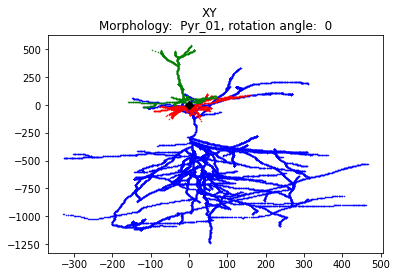

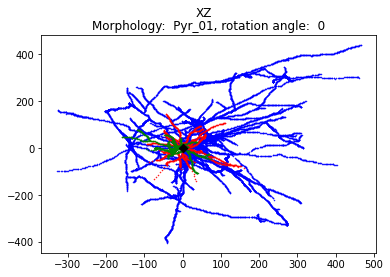

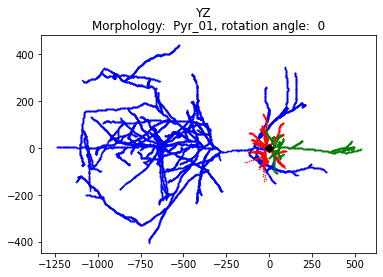

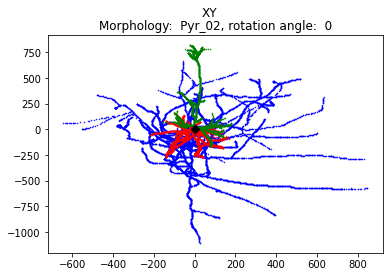

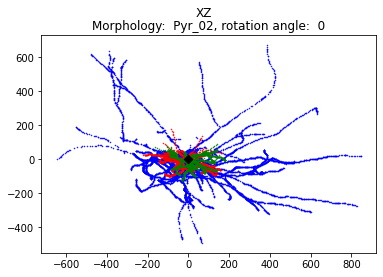

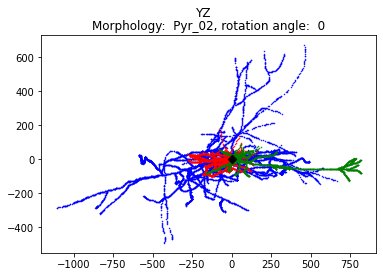

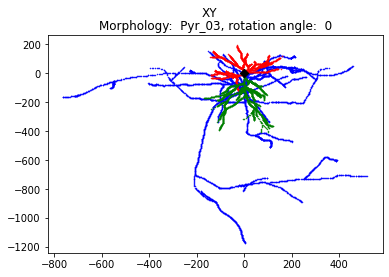

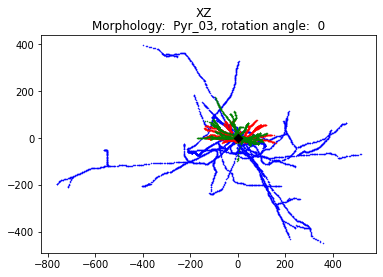

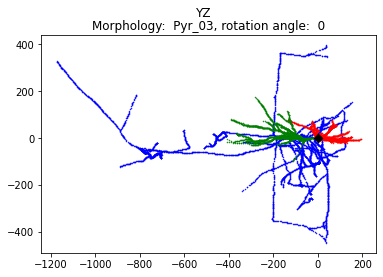

In [150]:
# Plot all three planes
morphologies_pyr = [morph_3, morph_4, morph_5]
for i in range(len(morphologies_pyr)):
    plot_morphologies([morphologies_pyr[i]],plane = 'XY', name_morph= morph_names_pyr[i])
    plot_morphologies([morphologies_pyr[i]],plane = 'XZ', name_morph= morph_names_pyr[i])
    plot_morphologies([morphologies_pyr[i]],plane = 'YZ', name_morph= morph_names_pyr[i])

### After 3D alignement on vector (3,4,5)

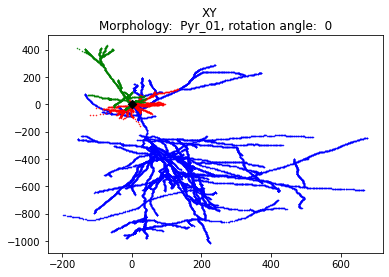

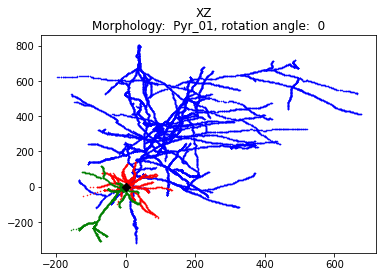

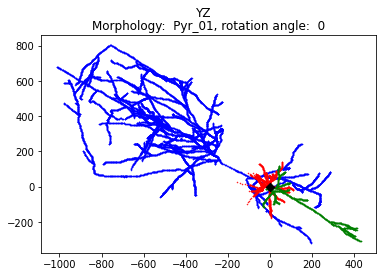

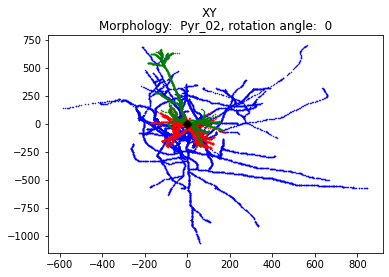

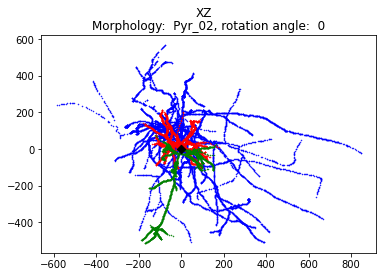

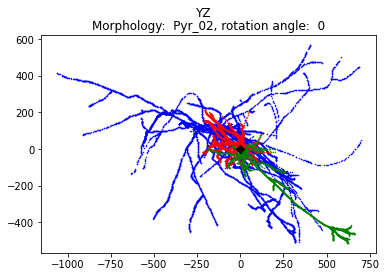

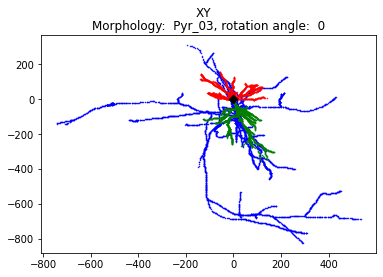

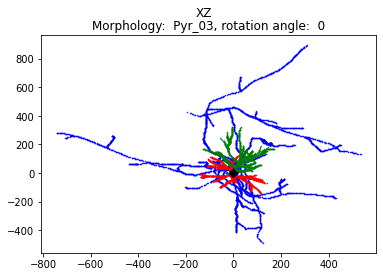

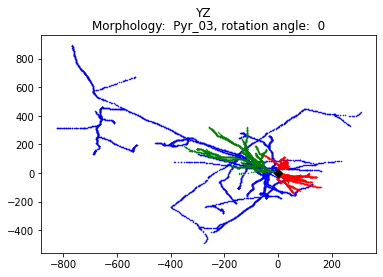

In [152]:
# alignement
# Plot all three planes
for i in range(len(morphologies_pyr)):
    morph=align_morphology_Z(morphologies_pyr[i],[3,4,5])
    plot_morphologies([morph],plane = 'XY', name_morph= morph_names_pyr[i])
    plot_morphologies([morph],plane = 'XZ', name_morph= morph_names_pyr[i])
    plot_morphologies([morph],plane = 'YZ', name_morph= morph_names_pyr[i])

## Ex3. Placing cells in a volume


<font size='3'> Define a hexagonal or cylindrical column of the same dimensions as in https://www.cell.com/fulltext/S0092-8674(15)01191-5  
<span>
<font size='3'>
Chose 5 points inside the volume to place your cells in, as follows: 
- inhibitory cells placed in randomly, witn no rotation or orientation rules applied
- pyramidal cells placed in the region of the volume corresponding to layers II-VI, with two of the cells with their apical dendrites facing up and one with its apical dendrites facing down
</span>

<font size='3'>Align the pyramidal cells' y axes with the column's vertical axis (larger values on the y axis corresponding to positions closer to the surface of the column). Plot the results in 2D, in all three planes, to show proper orientation. Also include a 3D plot of the column with all five cells placed in, inhibitory cells displayed in red and pyramidal ones in blue, magenta and cyan, respectively.  [2 pts]

## Ex4. Synaptic Pruning

<font size='3'> Your task is to implement the synapse pruning algorithm from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4597796/ using the number of appositions for a particular EXC-INH connection type provided below, bouton density of 0.2 and a 10^5 scaling factor for calculating the post-pruning bouton density.  After each step, plot a histogram of synapses per connection. At the end, represent the results with two histograms, one histogram of synapses per active connection, and one of synapses per reserve connection. Please note that as the data are made up, you should not expect to see the same results as in the paper. [2.5 pts]

In [ ]:
import numpy as np

appositions = np.concatenate((np.ones(6300),2*np.ones(5400),3*np.ones(4750),4*np.ones(3800),5*np.ones(3000),\
                              6*np.ones(2500),7*np.ones(2000),8*np.ones(1700),9*np.ones(1600),10*np.ones(1500),\
                              11*np.ones(1200),12*np.ones(1000),13*np.ones(800),14*np.ones(800),15*np.ones(700),\
                              16*np.ones(600),17*np.ones(550),18*np.ones(500),19*np.ones(450),20*np.ones(400)))

appositions = appositions.astype(int)